In [88]:
import pandas as pd
import os
import numpy as np
import school_analysis as sa
import re
from datetime import datetime

def load_genisis_df(name:str):
    path=os.path.join(sa.PROJECT_PATH, "data_", "genesis",name)
    df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=7, skipfooter=4, engine="python", index_col=None, header=None)
    df.replace("b'", "", inplace=True, regex=True)
    df.replace("'", "", inplace=True, regex=True)
    df.set_index(1, inplace=True)
    return df

df_1=load_genisis_df("graduates_1.csv")
df_2=load_genisis_df("graduates_2.csv")
df_2 = df_2.drop(0, axis=1)
df_3 = load_genisis_df("graduates_3.csv")
df_3 = df_3.drop(0, axis=1)
df = pd.concat([df_1, df_2, df_3], axis=1)


df.columns = range(df.shape[1])

df

df.replace("b'", "", inplace=True, regex=True)

df.rename(columns={df.columns[0]: 'state'}, inplace=True)


df['state'] = df['state'].fillna(method='ffill')

years = [int(item.split("/")[0]) for item in df.iloc[0].dropna().tolist() if item!='' and item!='\'']

states = [
    "Baden-Württemberg", 
    "Bayern", 
    "Berlin", 
    "Brandenburg", 
    "Bremen", 
    "Hamburg", 
    "Hessen", 
    "Mecklenburg-Vorpommern", 
    "Niedersachsen", 
    "Nordrhein-Westfalen", 
    "Rheinland-Pfalz", 
    "Saarland", 
    "Sachsen", 
    "Sachsen-Anhalt", 
    "Schleswig-Holstein", 
    "Thüringen"
]


data = []

for idx,state in enumerate(states):
    part = df.iloc[4+85*idx:]
    part = part[part.index=="Without secondary general school certificate"]
    for row in  part.iterrows():
        for y_idx,year in enumerate(years):
            male = row[1][1+y_idx*3]
            female = row[1][2+y_idx*3]
            total = row[1][3+y_idx*3]           
            record = {
                'state': state,
                'school': row[1]['state'], #state and schol have the same column              
                'year': year,
                'male': male,
                'female':female,
                'total': total
            }
            data.append(record)

df_melted = pd.DataFrame(data)


df_melted



C:\Users\jonas\AppData\Local\Temp\ipykernel_8284\3600786047.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['state'] = df['state'].fillna(method='ffill')


,state,school,year,male,female,total
0,Baden-Württemberg,Secondary general schools,1998,2124,1221,3345
1,Baden-Württemberg,Secondary general schools,1999,2165,1260,3425
2,Baden-Württemberg,Secondary general schools,2000,2204,1211,3415
3,Baden-Württemberg,Secondary general schools,2001,2213,1351,3564
4,Baden-Württemberg,Secondary general schools,2002,1985,1120,3105
...,...,...,...,...,...,...
45691,Thüringen,Total,2017,1043,577,1620
45692,Thüringen,Total,2018,1066,561,1627
45693,Thüringen,Total,2019,821,481,1302
45694,Thüringen,Total,2020,927,526,1453


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

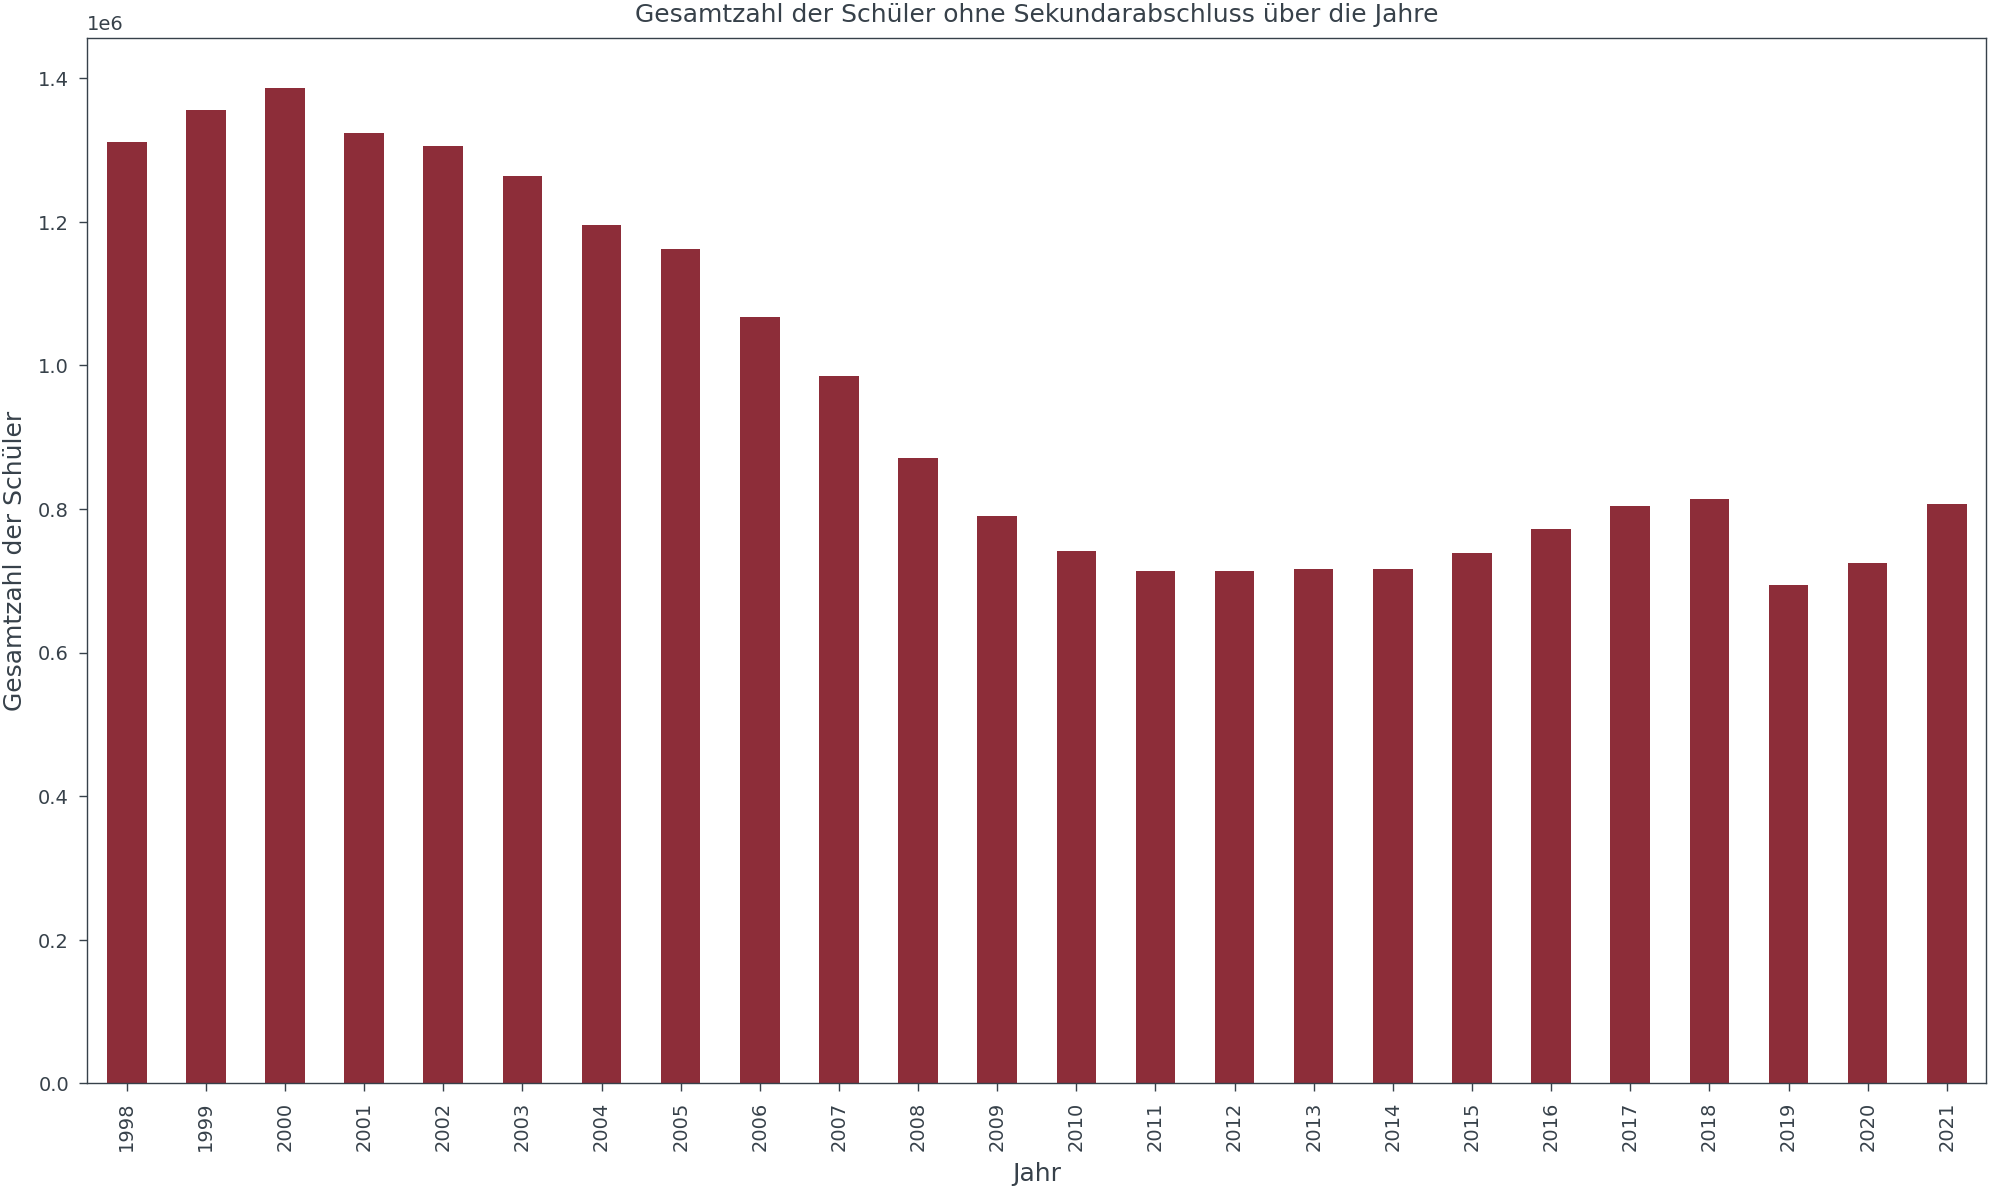

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df_melted['total'] = pd.to_numeric(df_melted['total'], errors='coerce')
# Gruppieren der Daten nach Jahr und Summieren der Gesamtzahl der Schüler
total_students_by_year = df_melted.groupby('year')['total'].sum()

# Plotten der Daten
plt.figure(figsize=(10, 6))
total_students_by_year.plot(kind='bar')
plt.title('Gesamtzahl der Schüler ohne Sekundarabschluss über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Gesamtzahl der Schüler')
plt.show()